Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Dataset Creation

In [111]:
from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


y :  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1

Visualize the dataset using scatter plots to understand the data distribution.

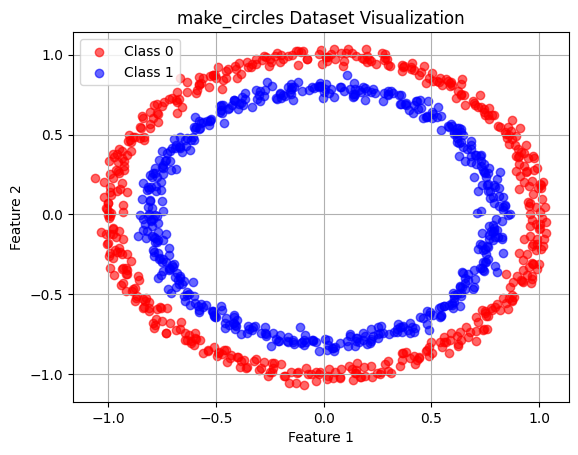

In [112]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.6)
plt.title('make_circles Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42)

Build a Basic Neural Network Model

Create a Sequential Model in TensorFlow with one dense layer.
Use Binary Crossentropy as the loss function.
Train the model and check the accuracy.

In [119]:
# 3. Build the model
model_1_layer = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 4. Compile the model
model_1_layer.compile(
    optimizer='SGD',
    loss='binary_crossentropy',  # Because we're doing binary classification
    metrics=['accuracy']
)

# 5. Train the model
history = model_1_layer.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=0
)

# 6. Evaluate performance
loss, accuracy = model_1_layer.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4917 - loss: 0.7128 

Test Loss: 0.7134
Test Accuracy: 0.4800


Improve the Model

Add more layers and neurons to the model.
Train the model for more epochs.
Try different optimizers like Adam instead of SGD.

In [121]:
# 3. Build the model
model_4_layers = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 4. Compile the model
model_4_layers.compile(
    optimizer='Adam',
    loss='binary_crossentropy',  # Because we're doing binary classification
    metrics=['accuracy']
)

# 5. Train the model
history = model_4_layers.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=0
)

# 6. Evaluate performance
loss, accuracy = model_4_layers.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.5768 

Test Loss: 0.5751
Test Accuracy: 0.8425


5. Visualize the Decision Boundary

Implement a function plot_decision_boundary() to visualize model predictions.

In [122]:
def plot_decision_boundary(model, X, y, title='Decision Boundary'):
    # Define bounds of the domain
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Generate grid coordinates
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Flatten the grid to pass through the model
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict classes for each point in the grid
    preds = model.predict(grid)

    # If output shape is (N, 1) use threshold 0.5, else argmax for multiclass
    if preds.shape[1] == 1:
        Z = (preds > 0.5).astype(int).reshape(xx.shape)
    else:
        Z = np.argmax(preds, axis=1).reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Plot decision boundaries for different models and compare results.

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


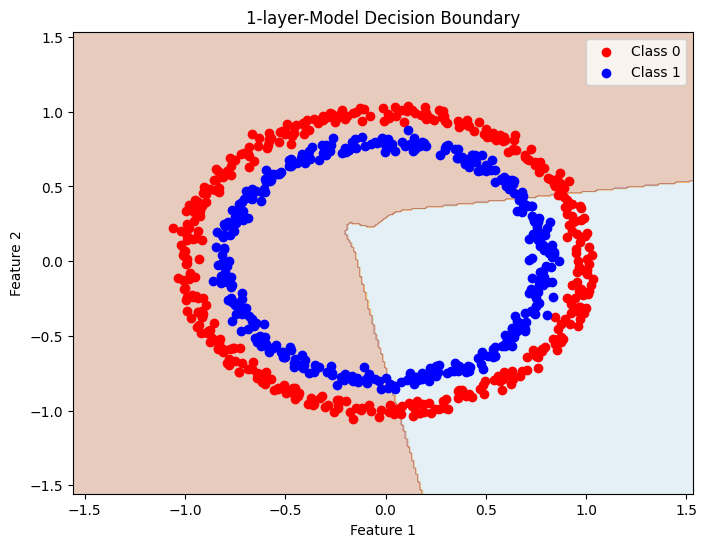

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


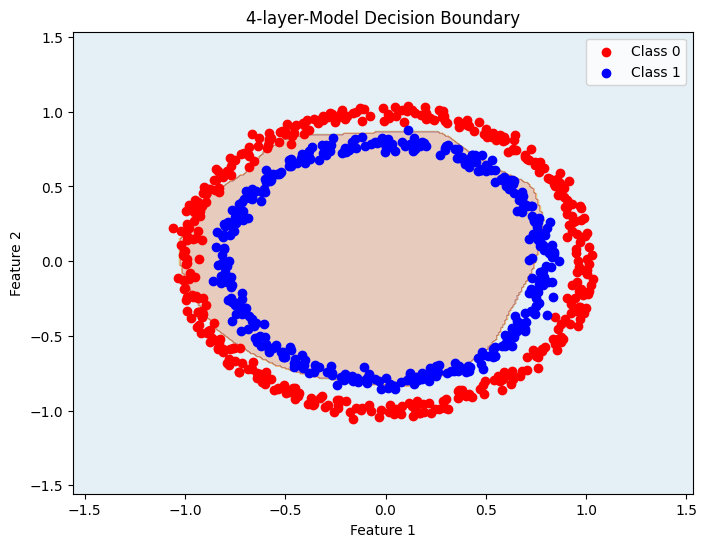

In [123]:
plot_decision_boundary(model_1_layer, X_test, y_test, title='1-layer-Model Decision Boundary')
plot_decision_boundary(model_4_layers, X_test, y_test, title='4-layer-Model Decision Boundary')
